<a href="https://colab.research.google.com/github/iupui-soic/pybootcamp/blob/main/Chapter1_Pooja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data= "https://github.com/ageron/data/raw/main/"

Downloading the CSV file: "lifesat.csv" from the GitHub directory "lifesat" and storing it in the dataframe.
Extracting the variables GDP per capita (USD), Life satisfaction and converting them into arrays.

---





In [3]:
lifesat_df = pd.read_csv(Data + "lifesat/lifesat.csv")
print(lifesat_df)

X= lifesat_df[["GDP per capita (USD)"]].values #explanatory  variable
Y= lifesat_df[["Life satisfaction"]].values    #response variable


           Country  GDP per capita (USD)  Life satisfaction
0           Russia          26456.387938                5.8
1           Greece          27287.083401                5.4
2           Turkey          28384.987785                5.5
3           Latvia          29932.493910                5.9
4          Hungary          31007.768407                5.6
5         Portugal          32181.154537                5.4
6           Poland          32238.157259                6.1
7          Estonia          35638.421351                5.7
8            Spain          36215.447591                6.3
9         Slovenia          36547.738956                5.9
10       Lithuania          36732.034744                5.9
11          Israel          38341.307570                7.2
12           Italy          38992.148381                6.0
13  United Kingdom          41627.129269                6.8
14          France          42025.617373                6.5
15     New Zealand          42404.393738

In [4]:
#setting the default font sizes
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=10)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [20]:
#making the output stable across multiple runs
import numpy as np
np.random.seed(42)


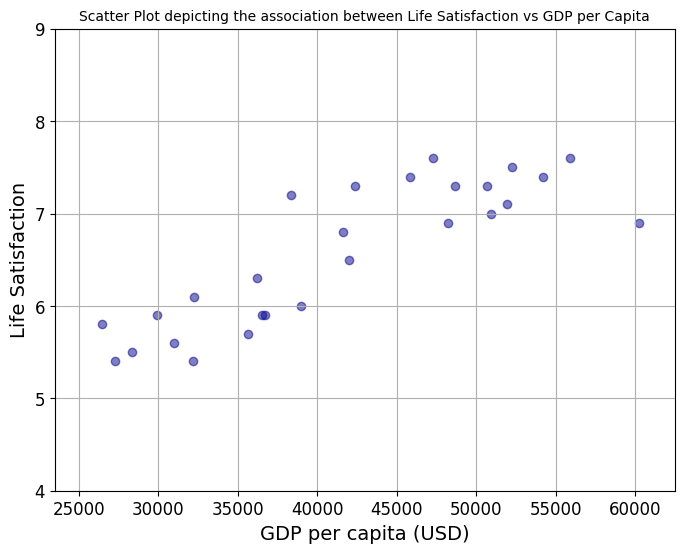

In [19]:
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.axis([23_500, 62_500, 4, 9]) #setting the minimum and maximum limits of X nad Y axes of the plot.
plt.scatter(lifesat_df["GDP per capita (USD)"], lifesat_df["Life satisfaction"], color='darkblue', alpha=0.5)
plt.title('Scatter Plot depicting the association between Life Satisfaction vs GDP per Capita')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life Satisfaction')
plt.grid(True)
plt.show()

Other plots:

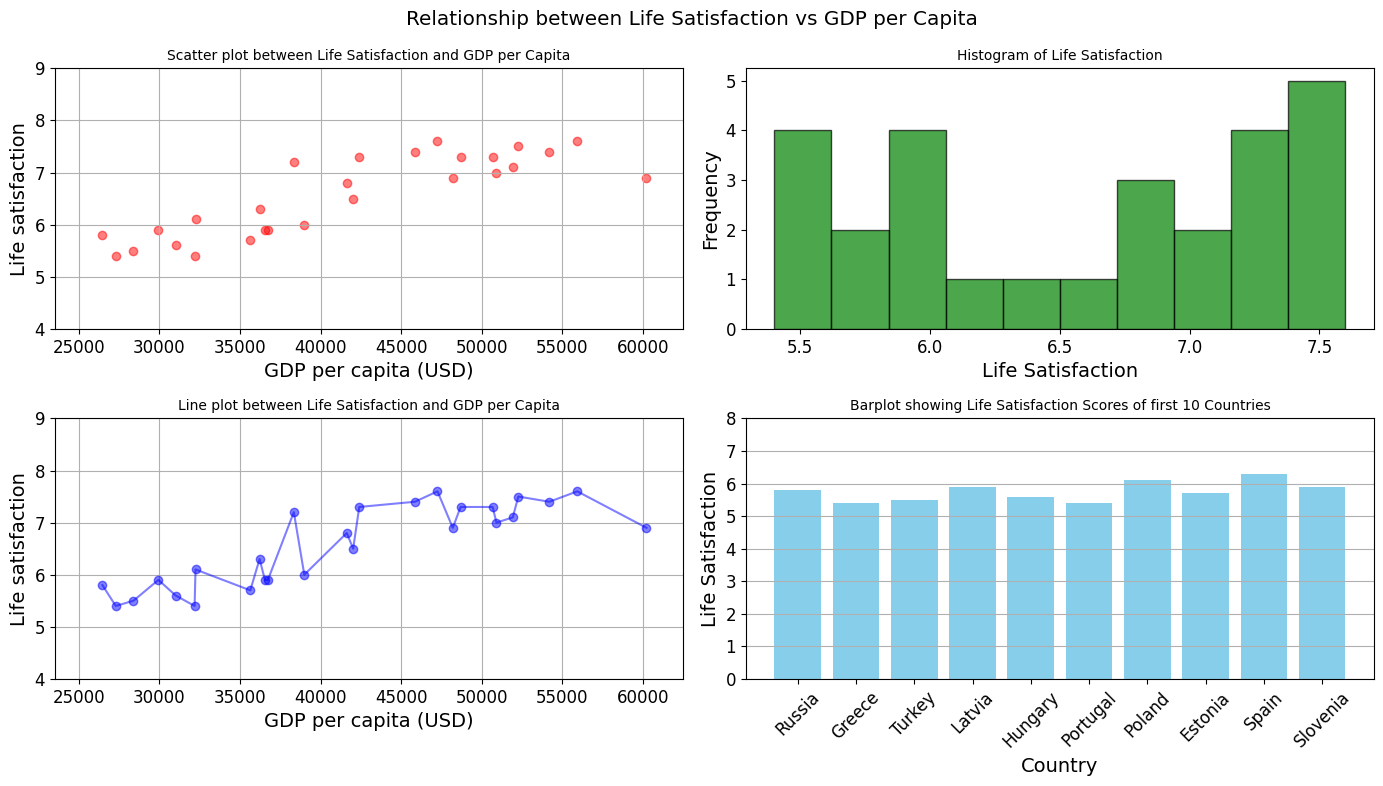

In [7]:
#Scatter between Life Satisfaction and GDP per Capita in the first subplot(top-left)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
axes[0,0].scatter(X, Y, color='red',marker = 'o', alpha=0.5)
fig.suptitle('Relationship between Life Satisfaction vs GDP per Capita')
axes[0,0].set_title('Scatter plot between Life Satisfaction and GDP per Capita')
axes[0,0].set_xlim(23_500, 62_500)
axes[0,0].set_ylim(4,9)
axes[0,0].set_xlabel('GDP per capita (USD)')
axes[0,0].set_ylabel('Life satisfaction')
axes[0,0].grid(True)

# Plotting a histogram of life satisfaction in the second subplot (top-right)
axes[0, 1].hist(lifesat_df['Life satisfaction'], bins=10, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Histogram of Life Satisfaction')
axes[0, 1].set_xlabel('Life Satisfaction')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(False)

#Line plot to observe the trend in the third subplot(Bottom-left)
axes[1,0].plot(X, Y, color='blue',marker = 'o', alpha=0.5)
fig.suptitle('Relationship between Life Satisfaction vs GDP per Capita')
axes[1,0].set_title('Line plot between Life Satisfaction and GDP per Capita')
axes[1,0].set_xlim(23_500, 62_500)
axes[1,0].set_ylim(4,9)
axes[1,0].set_xlabel('GDP per capita (USD)')
axes[1,0].set_ylabel('Life satisfaction')
axes[1,0].grid(True)

#sorting the dataframe by
First10_contries = lifesat_df.head(10)
axes[1,1].bar(First10_contries['Country'], First10_contries['Life satisfaction'], color='skyblue')
axes[1,1].set_title('Barplot showing Life Satisfaction Scores of first 10 Countries')
axes[1,1].set_xlabel('Country')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_ylabel('Life Satisfaction')
axes[1,1].set_yticks(range(0, 9))
axes[1,1].grid(axis='y')

plt.tight_layout()
plt.show()

Modelling 'Life satisfaction' as a linear function of 'GDP per capita' using Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
x = lifesat_df[['GDP per capita (USD)']]
y = lifesat_df[['Life satisfaction']]
model = LinearRegression()
model.fit(x, y)

# Printing the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Slope: {model.coef_[0]}')

Intercept: [3.74904943]
Slope: [6.77889969e-05]


Visualization of data points and linear regression line using Seaborn

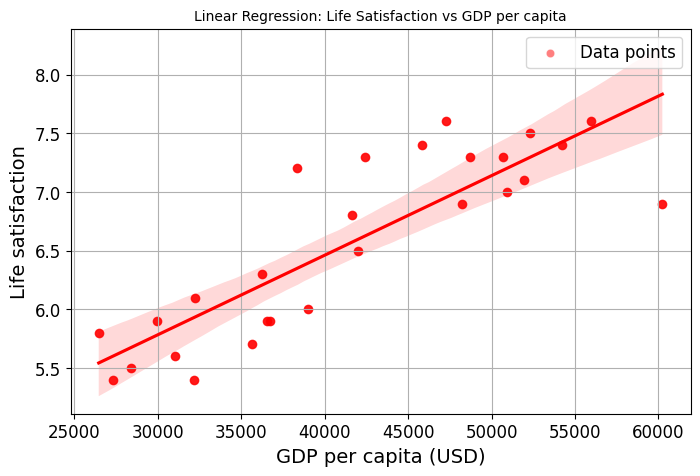

In [52]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GDP per capita (USD)', y='Life satisfaction', data=lifesat_df, color='red', alpha=0.5, label='Data points')
sns.regplot(x='GDP per capita (USD)', y='Life satisfaction', data=lifesat_df, color='red', line_kws={'color': 'red'})
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Linear Regression: Life Satisfaction vs GDP per capita')
plt.legend()
plt.grid(True)

plt.show()

Replacing linear regression with K-Nearest Neighbours

In [10]:
#Prediction for Cyprus
x_new = [[37_655.2]]
print(model.predict(x_new))


[[6.30165767]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
from sklearn.neighbors import KNeighborsRegressor
# Select a 3-Nearest Neighbors regression model
model = KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(x, y)

# Make a prediction for Cyprus
y_pred=model.predict(x_new)
print(y_pred)

[[6.33333333]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, Y)


LinearRegression()

Plotting the model fit

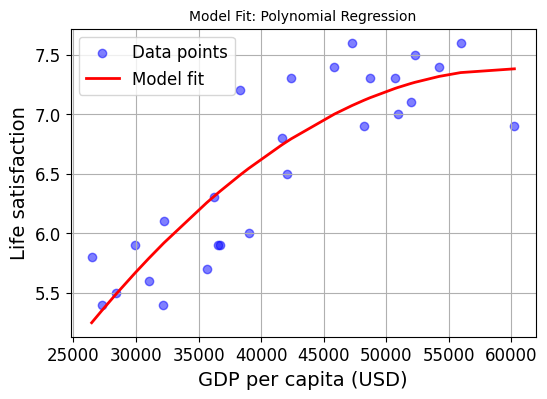

In [68]:
# Plot the model fit
plt.figure(figsize=(6, 4))
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data points')
plt.plot(X, poly_model.predict(X_poly), color='red', linewidth=2, label='Model fit')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Model Fit: Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

Trying out other models to check the difference in the life satisfaction score for cyprus as predicted by various models.

1) Ridge Regression

In [13]:
from sklearn.linear_model import Ridge

# Create and fit the ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, Y)

#Prediction for Cyprus
x_new = [[37_655.2]]
print(ridge_model.predict(x_new))



[[6.30165767]]


2) Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the decision tree regression model
tree_model = DecisionTreeRegressor()
tree_model.fit(X, Y)

#Prediction for Cyprus
x_new = [[37_655.2]]
print(tree_model.predict(x_new))

[7.2]


3) Random Forest Regression

In [15]:
from sklearn.ensemble import RandomForestRegressor

# Create and fit the random forest regression model
forest_model = RandomForestRegressor(n_estimators=100)
forest_model.fit(X, Y)

#Prediction for Cyprus
x_new = [[37_655.2]]
print(tree_model.predict(x_new))

[7.2]


<ipython-input-15-f99ee43bfd30>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_model.fit(X, Y)


4) Support Vector Regression (SVR)

In [16]:
from sklearn.svm import SVR

# Create and fit the SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X, Y)

#Prediction for Cyprus
x_new = [[37_655.2]]
print(svr_model.predict(x_new))


[6.13289931]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5) Gradient Boosting Regression

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

# Create and fit the gradient boosting regression model
gbr_model = GradientBoostingRegressor()
gbr_model.fit(X, Y)

#Prediction for Cyprus
x_new = [[37_655.2]]
print(gbr_model.predict(x_new))

[7.14372211]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
